In [1]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
sys.path.append("../")

In [3]:
from lib import lightcurve as lc
from lib import functions as func
from lib import plotting

In [4]:
sources_dir = [f.path for f in os.scandir("../data/HBL/") if f.is_dir()]
sources_dir.sort()
sources_dir = np.array(sources_dir)
sources_names = np.array([s.split("/")[-1] for s in sources_dir], dtype="S16")

In [5]:
sources_names

array([b'1ES0229+200', b'3FGLJ0627.9-1517', b'3FGLJ1258.4+2123',
       b'4FGLJ0224.2+1616', b'4FGLJ0344.4+3432', b'4FGLJ0854.0+2753',
       b'4FGLJ0946.2+0104', b'4FGLJ1124.0+2045', b'4FGLJ1124.9+2143',
       b'4FGLJ1258.7-0452', b'4FGLJ1300.0+1753', b'4FGLJ1359.1-1152',
       b'4FGLJ1439.5-2525', b'4FGLJ1447.0-2657', b'4FGLJ1528.4+2004',
       b'4FGLJ1554.2+2008', b'4FGLJ1808.8+3522', b'4FGLJ2030.5+2235',
       b'4FGLJ2133.1+2529', b'4FGLJ2223.3+0102', b'4FGLJ2326.2+0113',
       b'B21320+32', b'GB6J0239+1327', b'GB6J0244+1320', b'GB6J1231+1421',
       b'LEDA32311681', b'MG2J180813+3501', b'PKS0336-177',
       b'PMNJ0525-2010', b'PMNJ1439-2341', b'PMNJ2358-2853', b'RBS0958',
       b'RXJ1533.1+1854', b'RXJ2030.8+1935', b'TXS0100+151',
       b'TXS1312+240'], dtype='|S16')

In [6]:
nu_t = np.sort(np.genfromtxt("../data/HBL/hbl_names_mjd.txt", dtype=[("name","S16"), ("time",np.float)]), order="name")

In [7]:
#m = np.array([n in sources_names for n in nu_t["name"]])

In [8]:
#nu_t = nu_t[m]

In [9]:
#o = np.array([n in nu_t["name"] for n in sources_names])

In [10]:
#sources_dir = sources_dir[o]
#sources_names = sources_names[o]

In [11]:
for i, (n, s) in enumerate(zip(nu_t, sources_names)):
    name = n["name"]
    print(f"{i+1}) {n} -- {s} -- {name==s}")

1) (b'1ES0229+200', 55911.28) -- b'1ES0229+200' -- True
2) (b'3FGLJ0627.9-1517', 57833.31) -- b'3FGLJ0627.9-1517' -- True
3) (b'3FGLJ1258.4+2123', 57312.7) -- b'3FGLJ1258.4+2123' -- True
4) (b'4FGLJ0224.2+1616', 55911.28) -- b'4FGLJ0224.2+1616' -- True
5) (b'4FGLJ0344.4+3432', 57265.22) -- b'4FGLJ0344.4+3432' -- True
6) (b'4FGLJ0854.0+2753', 57269.8) -- b'4FGLJ0854.0+2753' -- True
7) (b'4FGLJ0946.2+0104', 58714.) -- b'4FGLJ0946.2+0104' -- True
8) (b'4FGLJ1124.0+2045', 56390.19) -- b'4FGLJ1124.0+2045' -- True
9) (b'4FGLJ1124.9+2143', 56390.19) -- b'4FGLJ1124.9+2143' -- True
10) (b'4FGLJ1258.7-0452', 57291.9) -- b'4FGLJ1258.7-0452' -- True
11) (b'4FGLJ1300.0+1753', 57312.7) -- b'4FGLJ1300.0+1753' -- True
12) (b'4FGLJ1359.1-1152', 55949.57) -- b'4FGLJ1359.1-1152' -- True
13) (b'4FGLJ1439.5-2525', 57879.53) -- b'4FGLJ1439.5-2525' -- True
14) (b'4FGLJ1447.0-2657', 57879.53) -- b'4FGLJ1447.0-2657' -- True
15) (b'4FGLJ1528.4+2004', 55702.77) -- b'4FGLJ1528.4+2004' -- True
16) (b'4FGLJ1554.2+2

In [12]:
lightcurves = []

for i, s in enumerate(sources_dir):
    lc_bins = np.genfromtxt(s+'/time.txt')
    lc_state = np.genfromtxt([f for f in glob.glob(s+"/flux*.txt")][0])
    not_nan = lc_state[~np.isnan(lc_state)]
    low_state_thr = np.percentile(not_nan,50)
    mean_low_state = np.mean(not_nan[not_nan < low_state_thr])
    std_low_state = np.std(not_nan[not_nan < low_state_thr])
    lc_state[np.isnan(lc_state)] = mean_low_state
    thr = mean_low_state + 3*std_low_state
    lightcurves.append(lc.LightCurve(lc_bins, lc_state[:-1], thr, sources_names[i]))
    
lightcurves = np.array(lightcurves)

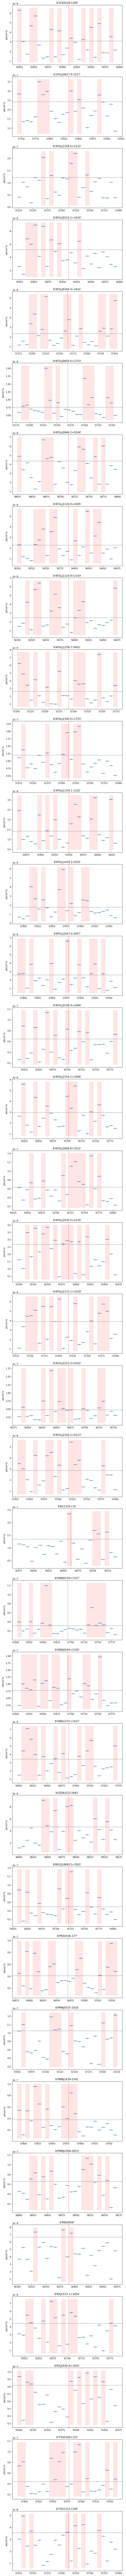

In [13]:
fig, ax = plt.subplots(len(lightcurves), 1, figsize=(9,len(lightcurves)*6))

for i, lc in enumerate(lightcurves):
    ax[i] = plotting.plot_lightcurve(ax[i], lc)
    ax[i].axvline(nu_t["time"][i], ls=':', color='red')

In [14]:
coincidences = np.array([lc(np.array([nu_t["time"][i]])) for i,lc in enumerate(lightcurves)]).flatten()

In [15]:
coincidences

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True])

In [16]:
bkg_tr = func.background_trials(10000, lightcurves)

100%|██████████| 10000/10000 [00:29<00:00, 334.17it/s]


In [17]:
mu = np.mean(bkg_tr)
print(mu)

12.5106


In [18]:
n_coinc = np.sum(coincidences)
print(n_coinc)

12


In [19]:
pval = np.sum(bkg_tr>=n_coinc)/len(bkg_tr)
print(pval)

0.6414


In [20]:
sig_tr = []
for i in range(len(lightcurves)):
    #if i==0: continue
    sig_tr.append(func.signal_trials(10000,i,lightcurves,seed=i))
sig_tr = np.array(sig_tr)

100%|██████████| 10000/10000 [00:03<00:00, 2651.08it/s]


In [21]:
mu_s = np.mean(sig_tr, axis=1)
print(mu_s)

[12.4957 13.1389 13.7452 14.4155 15.0743 15.6897 16.4538 17.0641 17.7272
 18.4001 18.9759 19.6445 20.3356 21.0116 21.6143 22.3003 22.9243 23.6716
 24.1959 24.9138 25.5666 26.2306 26.8966 27.489  28.1341 28.7689 29.3571
 30.0933 30.6931 31.2123 31.8661 32.3373 32.8577 33.3608 33.6883 34.1117]


In [22]:
n_sources_bins = np.linspace(-0.5,len(lightcurves)+0.5,len(lightcurves)+2)
print(n_sources_bins)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5]


In [23]:
val, _ = np.histogram(bkg_tr, bins=n_sources_bins, density=True)
cum_val = 1. - np.cumsum(val)

In [24]:
val_s = []
cumval_s = []
for tr in sig_tr:
    vals = np.histogram(tr, bins=n_sources_bins, density=True)[0]
    cum_vals = 1. - np.cumsum(vals)
    val_s.append(vals)
    cumval_s.append(cum_vals)

In [25]:
def prob(n, cum_vals):
    return(cum_vals[n])

In [26]:
pdf = np.array([val, *val_s])

In [27]:
pdf /= np.sum(pdf)

In [28]:
print(pdf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00285946 0.0027027  0.00983784]
 [0.         0.         0.         ... 0.0026     0.00274054 0.01139459]
 [0.         0.         0.         ... 0.00237838 0.00284865 0.0132    ]]


(0.0, 6.0)

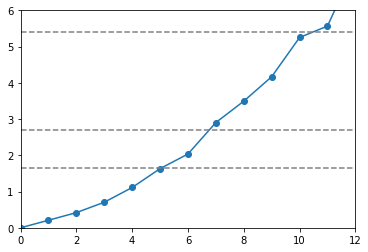

In [46]:
fig, ax = plt.subplots()
prof_lik = func.prof_likelihood(n_coinc,pdf)
ax.plot(range(len(prof_lik)), prof_lik, label=f"{i}", marker='o')
ax.axhline(1.282**2, ls='--', c='gray')
ax.axhline(1.645**2, ls='--', c='gray')
ax.axhline(2.326**2, ls='--', c='gray')
ax.set_xlim([0.,12.])
ax.set_ylim([0.,6])

In [30]:
ts = []
for n in bkg_tr:
    ts.append(func.test_statistic(n,pdf))
ts = np.array(ts)
ts[ts<0.] = 0.

In [31]:
np.sum(ts<0.)/len(ts)

0.0

In [32]:
from scipy.stats import chi2

def chi_squared(x, ndof):
    return chi2.pdf(x, ndof)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0.5, 0, 'Test Statistic')

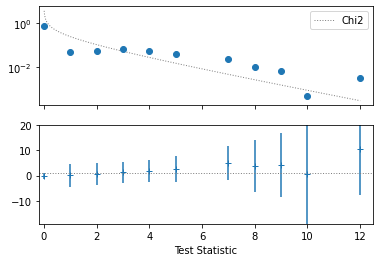

In [33]:
fig, ax = plt.subplots(2,1, sharex=True)
tsbins = np.linspace(-2.5, 12.5, 16)
tsc = (tsbins[:-1] + tsbins[1:]) / 2.
vals = np.histogram(ts, bins=tsbins, density=True)[0]
val_err = np.sqrt(vals) / vals
ax[0].errorbar(tsc, vals, ls="", marker='o')
ax[0].semilogy()

from scipy.optimize import curve_fit
popt, _ = curve_fit(chi_squared, tsc, vals, p0=[1.])
x=np.linspace(0.,12,1000)
ax[0].plot(x, chi_squared(x, popt[0]), ls=':', color='gray', lw=1, label='Chi2')

ax[0].set_xlim([-0.2, 12.5])
ax[0].legend()

ax[1].errorbar(tsc[vals!=0], vals[vals!=0]/chi_squared(tsc[vals!=0], popt[0]), yerr=val_err[vals!=0], ls="", marker='+')
ax[1].set_ylim([-19,20.])
ax[1].axhline(1., color='gray', ls=':', lw=1)

ax[1].set_xlabel("Test Statistic")

In [34]:
func.test_statistic(2,pdf)

../lib/functions.py:61: RuntimeWarning: divide by zero encountered in log
  return -2 * np.log(p_zero / p_h) if p_h != 0.0 else 0.0, ind


(inf, 2)

In [35]:
np.sum(ts>=func.test_statistic(2,pdf)[0])/len(ts)

0.0